<a href="https://colab.research.google.com/github/vibferreira/machine_learning_2021_UBS/blob/main/BARBOSA_FERREIRA_TP_LinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Lab: Linear Regression by using the gradient descent algorithm

Vitória Barbosa Ferreira - e2008984

## Utils

In [ ]:
from sklearn import datasets # donnees
import os # rep de travail
import pandas as pd # data analysis
from scipy import stats # stat desc
import matplotlib.pyplot as plt # graphiques
import numpy as np # maths
from numpy.linalg import inv, lstsq
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

file = '/content/gdrive/MyDrive/vitoria.barbosa.ferreira@usp.br 2021-08-09 21:44/Master/Copernicus - 15 01/Classes/3 semester/Machine Learning/Practice/Linear Regression/pm25_train_data.csv'

Mounted at /content/gdrive


## Data

In [ ]:
# file = 'pm25_train_data.csv'
# Read the data
data = pd.read_csv(file, delimiter=';')
data

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
0,24.0,7.0,13.0,300.0,74.0,3.9,1027.3,-19.7,0.0,5.1
1,93.0,25.0,76.0,900.0,22.0,2.7,1027.3,-16.4,0.0,2.7
2,117.0,77.0,99.0,1600.0,14.0,13.8,1012.5,-13.3,0.0,1.1
3,58.0,12.0,14.0,400.0,77.0,14.2,1018.9,-13.9,0.0,2.7
4,226.0,104.0,136.0,2299.0,15.0,11.9,1009.7,-7.5,0.0,1.3
...,...,...,...,...,...,...,...,...,...,...
11913,89.0,19.0,41.0,1300.0,21.0,-5.3,1035.3,-14.1,0.0,1.0
11914,281.0,22.0,60.0,2100.0,20.0,-0.8,1031.6,-11.6,0.0,1.4
11915,543.0,46.0,99.0,3000.0,12.0,0.4,1024.0,-7.1,0.0,1.3
11916,505.0,7.0,15.0,500.0,63.0,4.1,1026.7,-10.8,0.0,4.1


In [ ]:
#-- Display some statistics on the data by using the describe function on the dataframe
data.describe()

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
count,11918.000000,11667.000000,11636.000000,11462.000000,11677.000000,11898.000000,11898.000000,11898.000000,11898.000000,11900.000000
mean,144.962326,21.960768,44.788865,1165.367650,73.894402,17.924920,1009.787557,2.765969,0.047630,2.243664
std,103.807565,27.065010,33.186310,1019.736671,51.840188,10.751675,10.074917,13.483896,0.532651,1.346997
min,3.000000,0.571200,2.000000,100.000000,0.214200,-6.800000,984.500000,-31.300000,0.000000,0.000000
25%,71.000000,4.000000,19.000000,500.000000,34.000000,8.200000,1001.800000,-8.300000,0.000000,1.300000
50%,120.000000,12.000000,37.000000,900.000000,66.000000,19.900000,1009.400000,3.100000,0.000000,1.900000
75%,192.000000,29.000000,62.000000,1500.000000,103.000000,27.400000,1017.600000,15.000000,0.000000,2.700000
max,844.000000,224.000000,273.000000,10000.000000,345.000000,39.800000,1036.300000,28.500000,31.200000,12.900000


In [ ]:
# drop na values
data = data.dropna()
data.describe()

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
count,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000
mean,144.785609,21.803471,44.614596,1165.918100,74.123981,17.943513,1009.810802,2.826747,0.046918,2.235968
std,102.926739,26.880259,32.895568,1010.439512,51.904421,10.751609,10.075603,13.450111,0.535652,1.337821
min,3.000000,0.856800,2.000000,100.000000,0.214200,-6.800000,984.500000,-31.300000,0.000000,0.000000
25%,71.000000,4.000000,19.000000,500.000000,34.000000,8.200000,1001.800000,-8.200000,0.000000,1.300000
50%,120.000000,12.000000,36.000000,900.000000,66.000000,20.000000,1009.300000,3.100000,0.000000,1.900000
75%,192.000000,28.000000,62.000000,1500.000000,103.000000,27.400000,1017.600000,15.000000,0.000000,2.700000
max,844.000000,224.000000,273.000000,10000.000000,345.000000,39.800000,1036.300000,28.500000,31.200000,12.900000


In [ ]:
#-- Save the explanatory variables in a variable X (and their names in a varaible feature_names), and the target variable in Y
X = data.iloc[:, 1:len(data.columns)]
y = data['PM2.5']
X

,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
0,7.0,13.0,300.0,74.0,3.9,1027.3,-19.7,0.0,5.1
1,25.0,76.0,900.0,22.0,2.7,1027.3,-16.4,0.0,2.7
2,77.0,99.0,1600.0,14.0,13.8,1012.5,-13.3,0.0,1.1
3,12.0,14.0,400.0,77.0,14.2,1018.9,-13.9,0.0,2.7
4,104.0,136.0,2299.0,15.0,11.9,1009.7,-7.5,0.0,1.3
...,...,...,...,...,...,...,...,...,...
11913,19.0,41.0,1300.0,21.0,-5.3,1035.3,-14.1,0.0,1.0
11914,22.0,60.0,2100.0,20.0,-0.8,1031.6,-11.6,0.0,1.4
11915,46.0,99.0,3000.0,12.0,0.4,1024.0,-7.1,0.0,1.3
11916,7.0,15.0,500.0,63.0,4.1,1026.7,-10.8,0.0,4.1


### Analyser et sélectionner les données étudiées

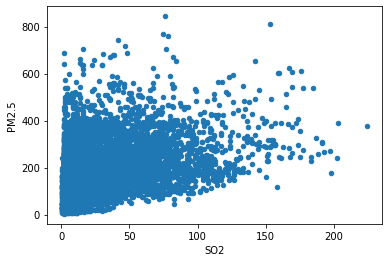

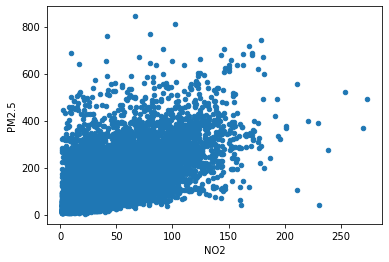

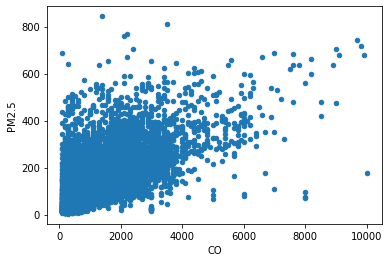

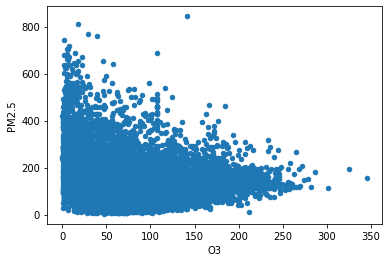

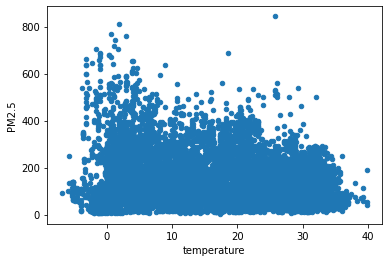

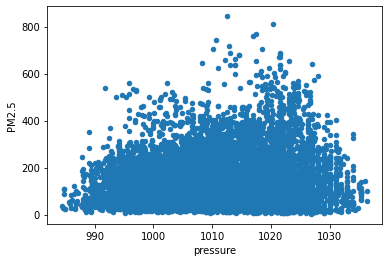

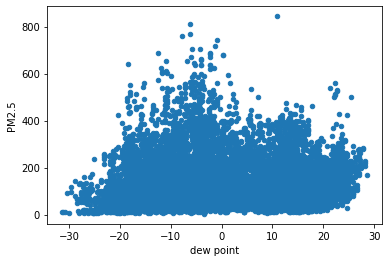

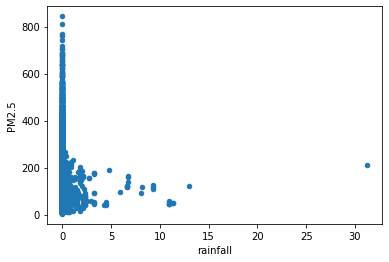

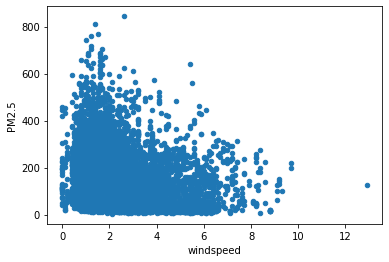

In [ ]:
#-- Scatterplots for each explanatory variable
for i in X.columns:
    data.plot.scatter(x=i,
                 y='PM2.5')


In [ ]:
# correlation
data.corr()

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
PM2.5,1.000000,0.485462,0.572813,0.636648,-0.218340,-0.246685,0.140336,-0.029720,-0.037032,-0.187595
SO2,0.485462,1.000000,0.598753,0.630310,-0.287325,-0.366533,0.231831,-0.242011,-0.041511,-0.163247
NO2,0.572813,0.598753,1.000000,0.744382,-0.417748,-0.217173,0.146548,0.014724,-0.009562,-0.347697
CO,0.636648,0.630310,0.744382,1.000000,-0.323917,-0.273665,0.139458,0.041599,0.022054,-0.313852
O3,-0.218340,-0.287325,-0.417748,-0.323917,1.000000,0.683293,-0.555046,0.459740,-0.030031,0.100689
temperature,-0.246685,-0.366533,-0.217173,-0.273665,0.683293,1.000000,-0.811459,0.810234,-0.001144,-0.093390
pressure,0.140336,0.231831,0.146548,0.139458,-0.555046,-0.811459,1.000000,-0.716093,-0.030913,0.062114
dew point,-0.029720,-0.242011,0.014724,0.041599,0.459740,0.810234,-0.716093,1.000000,0.087952,-0.350106
rainfall,-0.037032,-0.041511,-0.009562,0.022054,-0.030031,-0.001144,-0.030913,0.087952,1.000000,-0.035374
windspeed,-0.187595,-0.163247,-0.347697,-0.313852,0.100689,-0.093390,0.062114,-0.350106,-0.035374,1.000000


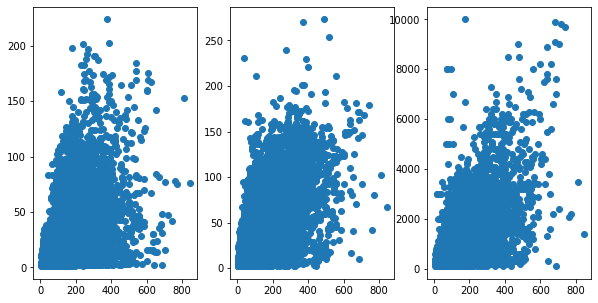

In [ ]:
#-- Select the explanatory variables for the simple linear regression, then the multiple linear regression, and display the scatter plots
plt.figure(figsize=(10,5))

#SO2
plt.subplot(131)
plt.scatter(data['PM2.5'],data['SO2'])

plt.subplot(132)
plt.scatter(data['PM2.5'],data['NO2'])

plt.subplot(133)
plt.scatter(data['PM2.5'],data['CO'])

plt.show()



In [ ]:
#-- Extract the data and creates two X matrices that will be used for the regression (have a look at page 26 to know the form of X):
#---- Xs for simple lin reg and Xm for multiple lin reg
Xs = np.vstack(X['CO'])

Xm = X[['CO', 'SO2', 'NO2']].to_numpy()
#-- Check the size of both matrices

print(Xs.shape, Xm.shape)
## Hint: use stack/hstack/vstack

(11160, 1) (11160, 3)


In [ ]:
Xm

array([[ 300.,    7.,   13.],
       [ 900.,   25.,   76.],
       [1600.,   77.,   99.],
       ...,
       [3000.,   46.,   99.],
       [ 500.,    7.,   15.],
       [1200.,   12.,   54.]])

** You want to standardise the data around its mean so the have the same range (scale)
And the the best linear regression MUST pass trough the centroid of X,Y (mean X and mean Y)

In [ ]:
#--- Write the standardisation function to mean-center the X data 
# each new standardized value indicates how many std the original data is from the mean (z-scores)

def standardisation(X:np.array) -> np.array:
  """ 
  X: single or multiple variables to be standardised 
  Returns np.array with standardized values around the mean center for each variable
  """
  mean = np.mean(X, axis=0)
  std = np.std(X, axis=0, ddof=1)
  return (X-mean)/std
    
#-- Test 1 - simple lin reg
Xs_stand = standardisation(Xs)

#-- Test 2 - multiple lin reg
Xm_stand = standardisation(Xm)

In [ ]:
stats.describe(Xs_stand)

DescribeResult(nobs=11160, minmax=(array([-1.0549054]), array([8.74281122])), mean=array([9.677643e-17]), variance=array([1.]), skewness=array([2.39100859]), kurtosis=array([9.40441346]))

In [ ]:
#-- Preparing the matrix used for the regression linear when using the gradient descent algorithm (add 1 column)
ones = np.ones((X.shape[0],1))

Xm_stand_r = np.hstack((ones, Xm_stand))
Xs_stand_r = np.hstack((ones, Xs_stand))

Xs_stand_r

array([[ 1.        , -0.85697173],
       [ 1.        , -0.26317073],
       [ 1.        ,  0.42959712],
       ...,
       [ 1.        ,  1.8151328 ],
       [ 1.        , -0.65903806],
       [ 1.        ,  0.03372978]])

In [ ]:
Xm.shape

(11160, 3)

In [ ]:
stats.describe(Xm_stand_r)

DescribeResult(nobs=11160, minmax=(array([ 1.        , -1.0549054 , -0.77925853, -1.29545098]), array([1.        , 8.74281122, 7.52211995, 6.94274076])), mean=array([ 1.00000000e+00,  9.67764300e-17,  0.00000000e+00, -2.03739853e-17]), variance=array([0., 1., 1., 1.]), skewness=array([0.        , 2.39100859, 2.35821185, 1.25159044]), kurtosis=array([-3.        ,  9.40441346,  6.99219605,  1.98891919]))

## Least squares or maximum likelihood solution

*start by calculating the best start parameters!!!!
*for each explanatory value you have two parameters (B0 and Bx)

In [ ]:
#-- To compare the results of the gradient descent algorithm, we will first implement an exact solution with the maximum likelihood
#Formulae recall: (X^T X)^-1 X^T Y

def coef_ml(X:np.array, 
            y: np.array) -> np.array:
  """
  X: np.array, indepedent variable
  y: np.arraym, depedent variable
  Returns np.array hyperparameters: b0 and b1"""

  transpose = X.transpose()
  return inv((transpose.dot(X))).dot(transpose).dot(y)
  
#-- Test 1  - simple reg
Xm_beta = coef_ml(Xm_stand_r, y)
#-- Test 2 - multiple reg
Xs_beta = coef_ml(Xs_stand_r,y)

#-- (We can also use the native functions of Scikit-Learn, but they are more parameters that needs to be tuned)

In [ ]:
print(Xs_beta)
print(Xm_beta)

[144.78560932  65.52805564]
[144.78560932  44.35291959  10.09815632  19.89592831]


In [ ]:
# or by using numpy built-in function
beta0, beta1 = lstsq(Xs_stand_r, y, rcond=None)[0]
beta0,beta1

(144.78560931899636, 65.52805563850977)

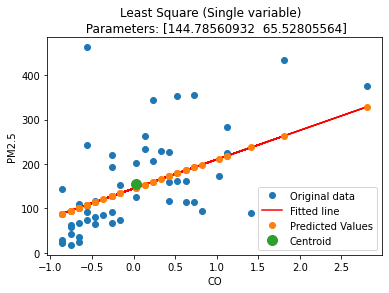

In [ ]:
# Plotting the line of the 'exact solution' or the Regression line that describes our sample data
# NOTE: Only for the first 50 values of the dataset

# y_stand = standardisation(y) # recalculate the beta values based on the standardised y
y_hat = (Xs_beta[1]*Xs_stand_r[:50,-1] + Xs_beta[0])
error = np.sqrt(np.square(y[:50]-y_hat[:50]))

plt.plot(Xs_stand_r[:50,-1], y[:50], 'o', label='Original data')
plt.title(f'Least Square (Single variable)  \n Parameters: {Xs_beta}')
plt.plot(Xs_stand_r[:50,-1], y_hat[:50], 'r', label='Fitted line')
plt.plot(Xs_stand_r[:50,-1], y_hat[:50], 'o', label='Predicted Values')
plt.plot(np.mean(Xs_stand_r[:50,-1]), np.mean(y[:50]),'o', label='Centroid', markersize=10)
plt.xlabel('CO')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

## Gradient descent algorithm

In the following we will implement several functions to apply linear regression.
These functions should be generic and work for any number of explanatory variables. You should be able to apply them to Xs and Xm standardized variables.

WARNING: parameters of the functions needs to be completed

In [ ]:
# no for loop (matrix multiplication)
#-- Model
def f(X:np.array, 
      betas:np.array) -> np.array:
  """
  X: np.array, independent variable
  betas: np.array, hyperparameters b0 and b1
  Returns np.array of the predicted values (regression line)
  """
  return np.dot(X,betas) 

Yhat1 = f(Xs_stand_r,Xs_beta)
Yhat3 = f(Xm_stand_r,Xm_beta)

#-- Test 1 - simple reg
print('Simple regression:',Yhat1[:5])

#-- Test 2 - multiple reg
print('Multiple regression:',Yhat3[:5])

Simple regression: [ 88.62991786 127.54054331 172.93627301  95.1150221  218.26715166]
Multiple regression: [ 82.09399419 153.29661435 217.46870806  88.9666424  280.67260401]


In [ ]:
# Xs_stand.shape
# Xs_beta.shape
# np.dot(Xs_stand,Xs_beta)

In [ ]:
#%% Cost function 
# A cost function will be used to calculate the sum of the squared residuals for each regression line 

def cost(betas: np.array,
         X:np.array,
         y:np.array) -> np.array:
  """
  betas: np.array, hyperparameters b0 and b1
  X: np.array, independent variable
  y: np.array, depedent variable
  Return the mean of the squared residuals"""

  y_hat = f(X,betas)
  return 1/(2*len(y))*np.sum(np.square(y_hat-y),axis=0)

#%% Test 1 - simple reg
print('Simple regression: ', cost(Xs_beta,Xs_stand_r,y))

#%% Test 2 - multiple reg
print('Multiple regression: ',cost(Xm_beta,Xm_stand_r,y))

Simple regression:  3149.7114780201705
Multiple regression:  3004.710579669741


In [ ]:
#%% Computation of the gradient
def grad(X: np.array, 
         betas: np.array, 
         Y: np.array) -> np.array:
  """
  X: np.array, independent variable
  betas: np.array, hyperparameters b0 and b1
  y: np.array, depedent variable
  Return np.array of the gradients of the function (derivatives in relation to the intercept and the slope)
  """
  m = X.shape
  return 1/m[0]*np.dot(f(X, betas)-Y,X) # Derivative error / Derivative  weights 
    
#%% Test 1 - simple reg
grad_simple = grad(Xs_stand_r,Xs_beta,y)
print('Simple regression: ', grad_simple)

#%% Test 2 - multiple reg
grad_multiple = grad(Xm_stand_r,Xm_beta,y)
print('Multiple regression: ', grad_multiple)

Simple regression:  [6.87825742e-14 6.23443949e-14]
Multiple regression:  [-1.86218225e-14  4.12675071e-14 -3.07035958e-14  1.16539196e-14]


In [ ]:
#%% Gradient descent algorithm
def grad_descent(betas: np.array, 
                 X:np.array, 
                 y:np.array, 
                 n_interations: int, 
                 learn_rate: float) -> (np.array,int):

  """
  betas: np.array, hyperparameters b0 and b1 (initialisation)
  X: np.array, independent variable
  y: np.array, depedent variable
  n_interations: int, number of interations
  learn_rate: float, the step in which the function learn the optimal parameters
  """               
  beta_array = list()
  cost_array = list()

  for _ in range(n_interations):
    # step size
    betas -= learn_rate * grad(X, betas, y)

    # cost function
    cost_tosave = cost(betas, X, y)

    # check if the diff of two consecutive interations is low
    if len(cost_array) > 2 and (cost_array[-1] - cost_tosave < 0.0000000001):
      break

    # saving list of numpy arrays 
    cost_array.append(cost_tosave)
    beta_array.append(betas.copy()) # copying the betas to solve numpy pointer to the memory issue

  return np.array(beta_array), np.array(cost_array)


In [ ]:


#-- Test 1  - simple reg
start = [0,  1]  
n_interations = 5000
new_betas, cost_f= grad_descent(start, Xs_stand_r, y, n_interations, 0.001)
print('Optimal betas \n \nSingle variable: ', new_betas[-1], 'Least error: ', np.min(cost_f))

#-- Test 2 - multiple reg
start_m = [0,  1, 0 , 5] 
new_betas_m, cost_f_m = grad_descent(start_m, Xm_stand_r, y, n_interations, 0.001)
print('\nMultiple variable: ', new_betas_m[-1], 'Least error: ', np.min(cost_f_m))

Optimal betas 
 
Single variable:  [143.81248903  65.0941608 ] Least error:  3150.279083499

Multiple variable:  [143.81248903  39.47047907  11.82305362  23.2272004 ] Least error:  3010.164082181931


## Experiment with several initialisations: visualisation of the cost function and parameter values during the iterations

In [ ]:
# simple reg
param = [[0,1],[50,25],[180,85]]

_,cost_f_2= grad_descent(param[1], Xs_stand_r, y, n_interations, 0.005)
_,cost_f_3= grad_descent(param[2], Xs_stand_r, y, n_interations, 0.005)

y_axis_s = [cost_f, cost_f_2, cost_f_3]

# multiple reg 
param_m = [[0,  1, 0 , 5],[75, 25, 5, 10],  [180, 85, 20, 40]]

_, cost_f_m_2= grad_descent(param_m[1], Xm_stand_r, y, n_interations, 0.005)
_, cost_f_m_3= grad_descent(param_m[2], Xm_stand_r, y, n_interations, 0.005)

y_axis_m = [cost_f_m, cost_f_m_2, cost_f_m_3]


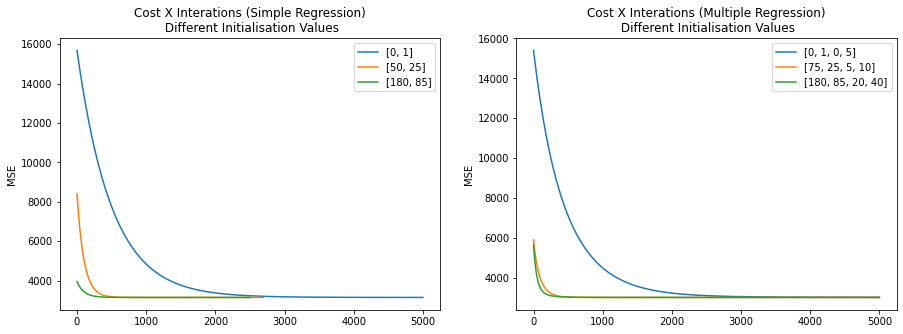

In [ ]:
def plot_comparison(y_axis_s:list, 
                    y_axis_m:list,
                    param_s:list,
                    param_m:list, 
                    x_axis_s=None,
                    x_axis_m=None,
                    legend:str = ''):

    """ Plot a comparison between single and multiple regression """

    #-- Test 1  - simple reg 
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
    ax1.plot(y_axis_s[0], label = f'{param_s[0]}')
    ax1.plot(y_axis_s[1], label = f'{param_s[1]}')
    ax1.plot(y_axis_s[2], label = f'{param_s[2]}')
    ax1.set_title(f'Cost X Interations (Simple Regression)\n {legend}')
    ax1.set_ylabel('MSE')
    ax1.legend()

    #-- Test 2 - multiple reg
    ax2.plot(y_axis_m[0], label = f'{param_m[0]}')
    ax2.plot(y_axis_m[1], label = f'{param_m[1]}')
    ax2.plot(y_axis_m[2], label = f'{param_m[2]}')
    ax2.set_title(f'Cost X Interations (Multiple Regression)\n {legend}')
    ax2.set_ylabel('MSE')
    ax2.legend()

    plt.show()

plot_comparison(y_axis_s, y_axis_m, param, param_m, legend="Different Initialisation Values" )

**Notes:**
The initialisation values (b0 and b1) play an important role on how the algorithm will learn the optimal parameters. If too low, it might be necessary a very high number of interations to achieve the optimal results. If too high, you may overshoot your estimation. The graphs above shows that smaller init values take longer to achieve the lowest MSE values while higher scores achieve then faster. However, the highest init values [180, 85] and [180, 85, 20, 40] shows that the error starts low, but never achieve as low as the previous init values, since they are already higher than the optimal parameters that would provide the lowest MSE. 


## Experiment with several learning rates: visualisation of the cost function and parameter values during the iterations

In [ ]:
# simple reg
learn = [0.001, 0.0001, 0.00001]

_,cost_f_2_lr = grad_descent(param[0], Xs_stand_r, y, n_interations, learn[1])
_,cost_f_3_lr = grad_descent(param[0], Xs_stand_r, y, n_interations, learn[2])

y_axis_s_learn = [cost_f, cost_f_2_lr, cost_f_3_lr]

# multiple reg 

_, cost_f_m_2_lr= grad_descent(param_m[0], Xm_stand_r, y, n_interations, learn[1])
_, cost_f_m_3_lr= grad_descent(param_m[0], Xm_stand_r, y, n_interations, learn[2])

y_axis_m_learn = [cost_f_m, cost_f_m_2_lr, cost_f_m_3_lr]

In [ ]:
plot_comparison(y_axis_s_learn, y_axis_m_learn, learn, learn, legend="Different Learning Rates" )

**Notes:**
The graph above uses the same init parameters [0, 1] and [0,1,0,5] for simple and multiple regression, respectively. The learning rate defines how big is the step between two consecutive tested hyperparameters. If too small (orange and green line) it will require more interactions in order to stabilises the error. 

## Notes
**on the choice of the stopping criterion:** It is not always necessary to run the algorithm until the end of the pre-defined number of interactions (since you do not know how mamy exactly you would need). Therefore, an additional stopping criteria was added in order to stop the loop if the difference between two consecutive MSE values were smaller than 0.0000000001, which indicates that from this error onwards the algorithm is no longer improving. 




**on the data normalisation:** Data normalisation is an important pre-processing step that facilitates the interpretations of the results, specially among variables that are in different scales, once all the normalised variables are rescaled in reference to how close or far, in terms of standard deviations, they are from their mean center.





**Notes:**

Linear regression is a straight forward approach for modelling the relationship between dependent and independent variables, when the indepedent variable is a continous variable.